In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

def get_font_family():
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인
    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null
        import matplotlib.font_manager as fm
        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family
get_font_family()
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당
font_family = get_font_family()
# 폰트설정
plt.rc('font', family=font_family)
# 마이너스폰트 설정
plt.rc('axes', unicode_minus=False)
# 그래프 스타일 설정
plt.style.use('ggplot')
# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:
df = pd.read_csv('./data/2nd/실전db.csv')
df

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR
...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879271 entries, 0 to 879270
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   USER_ID     879271 non-null  int64 
 1   JOIN_DATE   879271 non-null  object
 2   D_TYPE      879271 non-null  object
 3   STORE_ID    879271 non-null  int64 
 4   GOODS_TYPE  879271 non-null  object
 5   DATE        879271 non-null  object
 6   COUNT       879271 non-null  int64 
 7   AD1         879271 non-null  object
dtypes: int64(3), object(5)
memory usage: 53.7+ MB


In [4]:
df['COUNT'].describe()

count    879271.000000
mean          1.029079
std           0.512428
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          61.000000
Name: COUNT, dtype: float64

In [5]:
df.nunique()

USER_ID       165425
JOIN_DATE       2352
D_TYPE             3
STORE_ID        1061
GOODS_TYPE         4
DATE             366
COUNT             56
AD1               85
dtype: int64

In [6]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.month
df['day'] = df['DATE'].dt.day
df['DoW'] = df['DATE'].dt.day_name()

df['JOIN_DATE'] = pd.to_datetime(df['JOIN_DATE'])
df['j_year'] = df['JOIN_DATE'].dt.year
df['j_month'] = df['JOIN_DATE'].dt.month
df['j_day'] = df['JOIN_DATE'].dt.day
df['j_DoW'] = df['JOIN_DATE'].dt.day_name()


In [7]:
df['JOIN_DATE']

0        2014-01-07
1        2014-02-14
2        2014-11-20
3        2014-12-04
4        2014-12-07
            ...    
879266   2020-12-31
879267   2020-12-31
879268   2020-12-31
879269   2020-12-31
879270   2020-12-31
Name: JOIN_DATE, Length: 879271, dtype: datetime64[ns]

C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


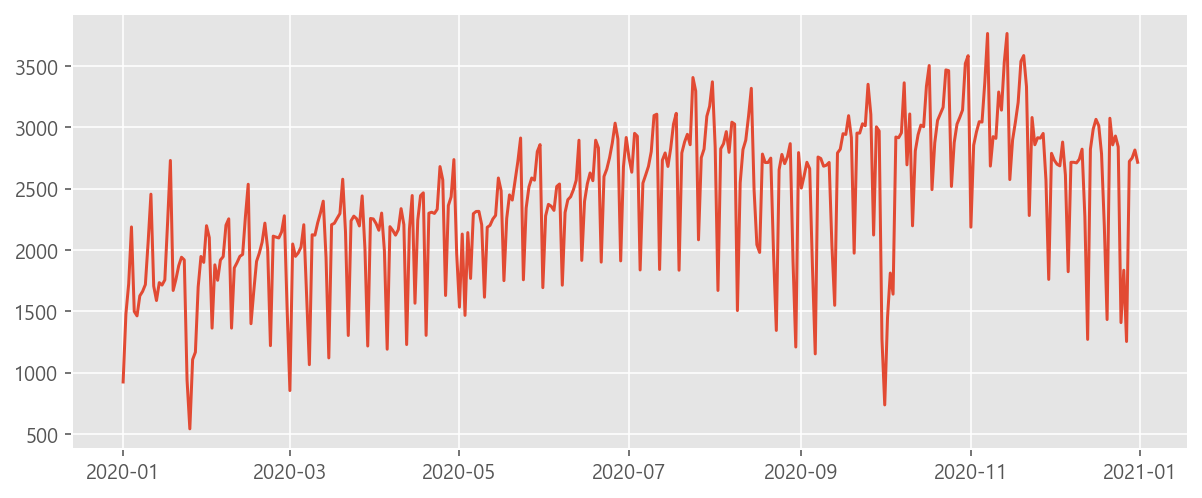

In [8]:
# 날짜별 사용 횟수
plt.figure(figsize=(10,4))
sns.lineplot(df['DATE'].value_counts().index, df['DATE'].value_counts().values)
plt.show()

C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


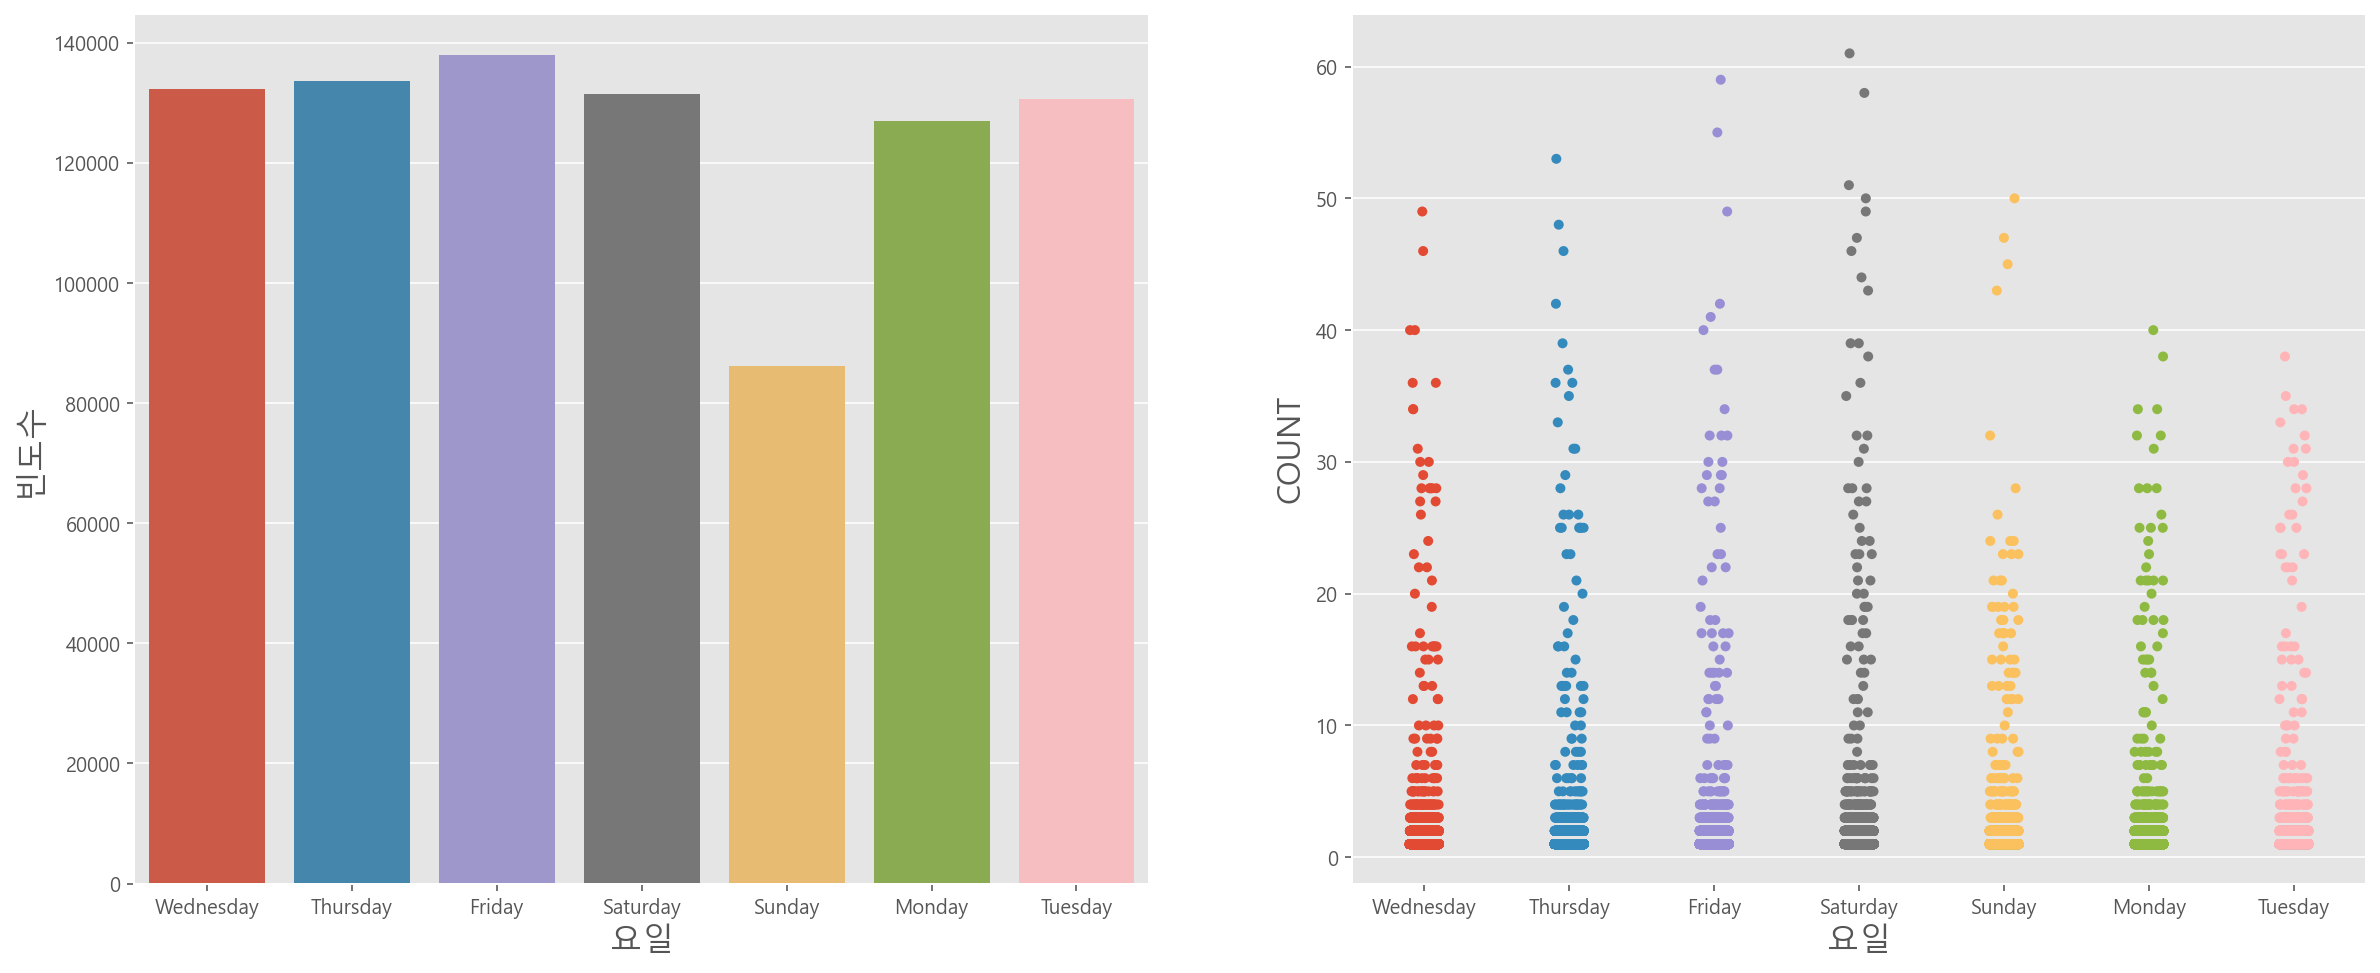

In [9]:
fig = plt.figure(figsize=(20,8))
gs = GridSpec(1,2)
sns.countplot(data=df, x='DoW', ax = fig.add_subplot(gs[0,0]))

plt.ylabel('빈도수', fontsize=16)
plt.xlabel('요일', fontsize=16)

sns.stripplot(x=df['DoW'], y=df['COUNT'], ax=fig.add_subplot(gs[0,1]))
plt.ylabel('COUNT', fontsize=16)
plt.xlabel('요일', fontsize=16)
fig.show()



* ### 가장 많이 사용하는 날 : 금요일, 가장 적게 사용하는 날 : 일요일(압도적)
* ### 요일 별 토요일, 금요일에 제일 오래 사용

C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


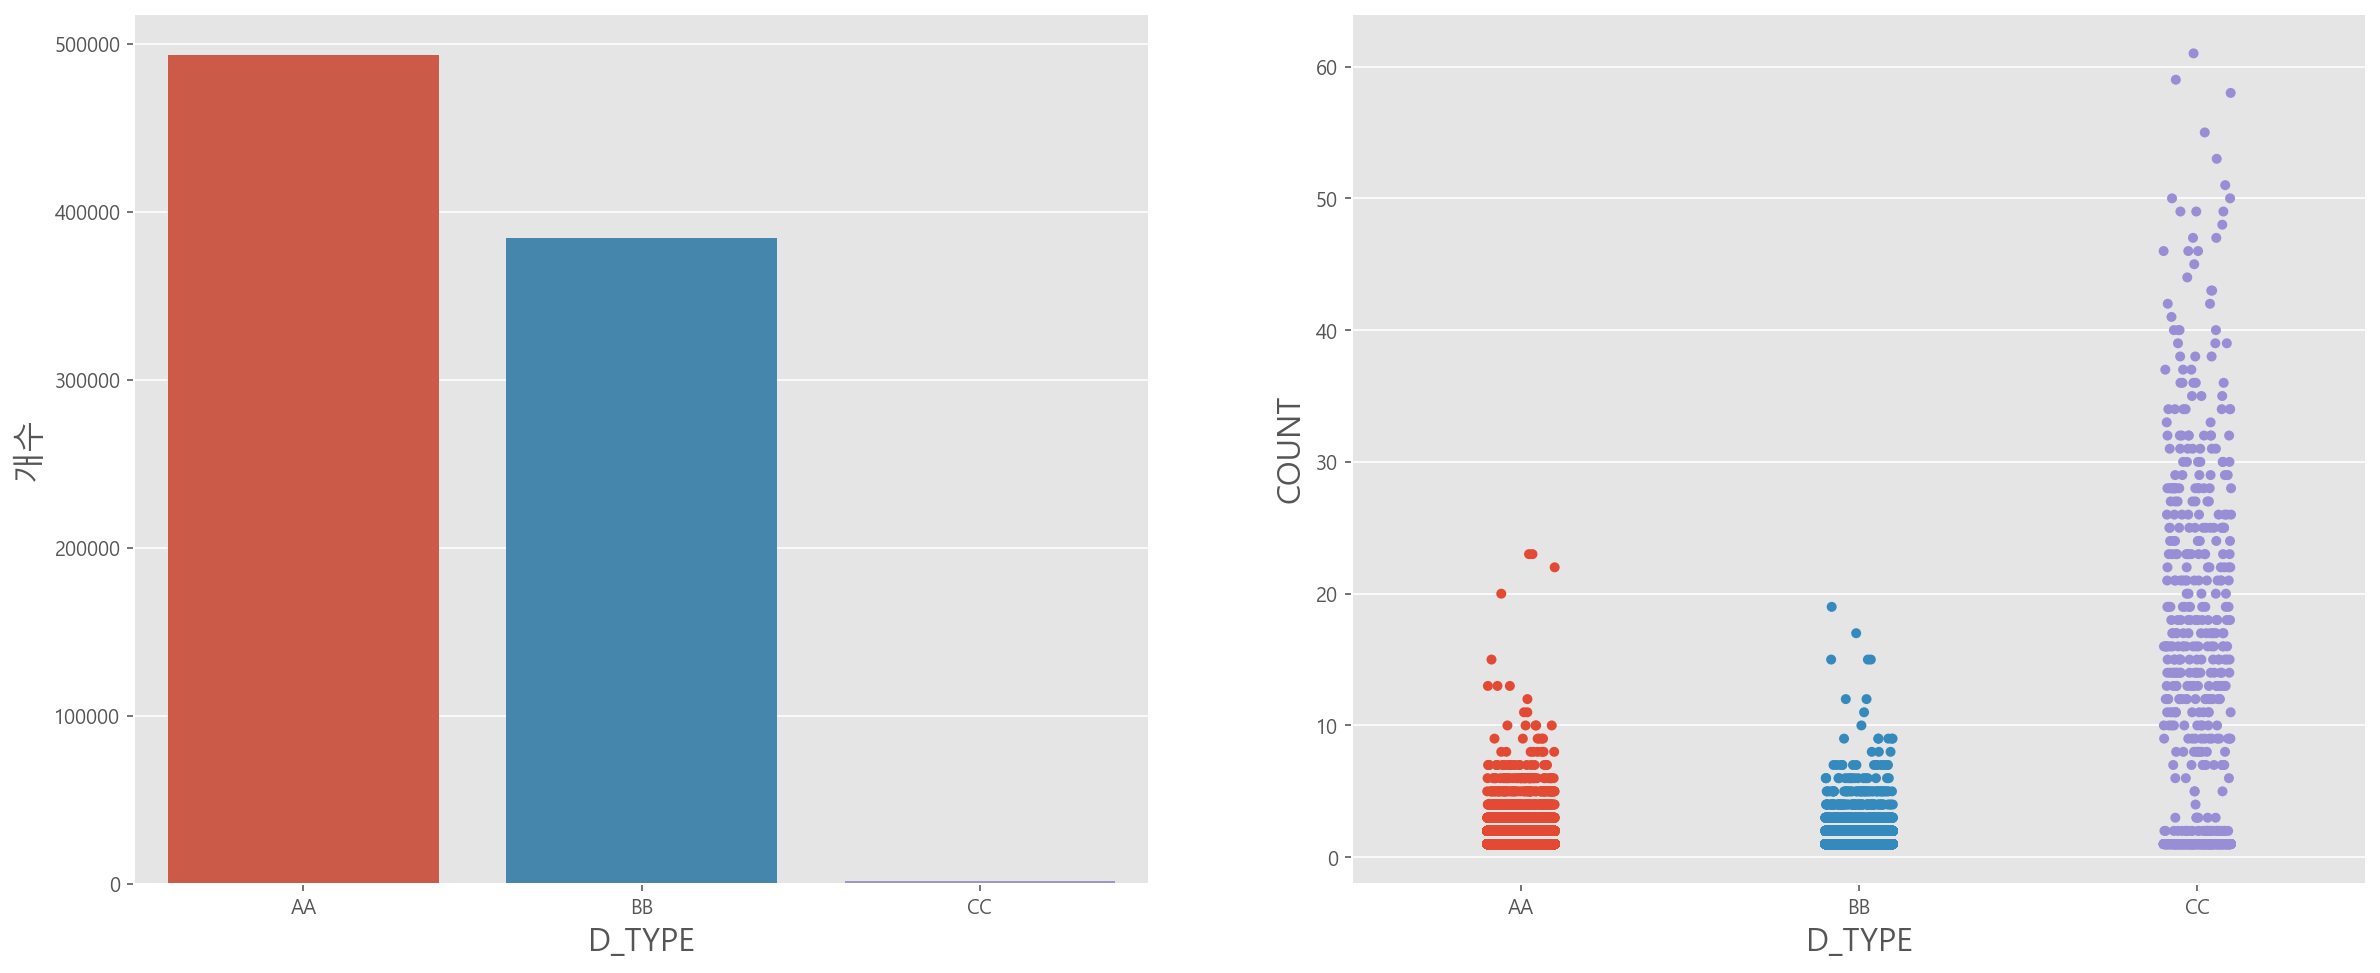

In [10]:
fig = plt.figure(figsize=(20,8))
sns.countplot(data=df, x='D_TYPE', ax=fig.add_subplot(gs[0,0]))

plt.ylabel('개수', fontsize=16)
plt.xlabel('D_TYPE', fontsize=16)

sns.stripplot(x=df['D_TYPE'], y=df['COUNT'], ax=fig.add_subplot(gs[0,1]))
plt.ylabel('COUNT', fontsize=16)
plt.xlabel('D_TYPE', fontsize=16)
fig.show()

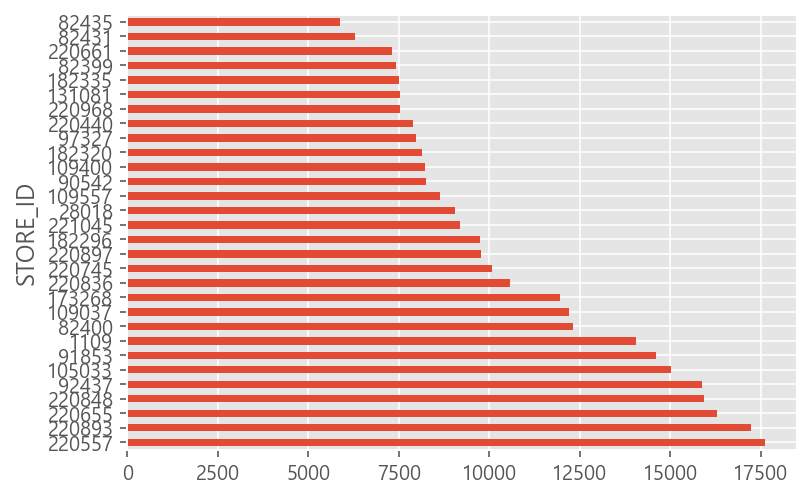

In [11]:
store_count = df.groupby('STORE_ID').count()['USER_ID'].sort_values(ascending=False)[:30].plot.barh()


In [27]:
df['COUNT'].unique()

array([ 1,  2,  6, 11,  3,  7,  4, 28, 14,  9, 13, 12, 21, 19,  5, 10,  8,
       23, 27, 20, 16, 18, 33, 17, 15, 25, 24, 22, 39, 31, 32, 36, 29, 30,
       34, 26, 35, 49, 37, 38, 48, 43, 40, 47, 42, 51, 50, 45, 46, 55, 61,
       59, 58, 53, 41, 44], dtype=int64)

Text(0.5, 0, 'COUNT')

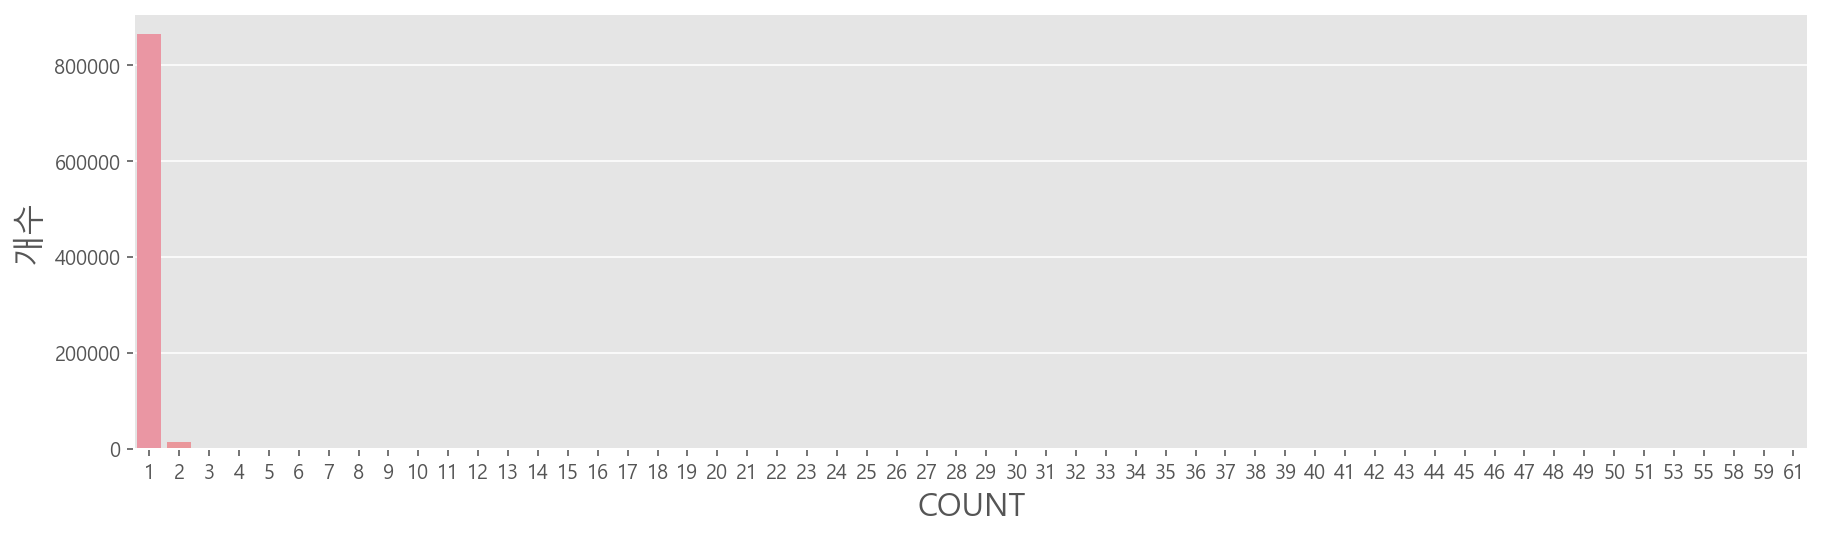

In [23]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x='COUNT')

plt.ylabel('개수', fontsize=16)
plt.xlabel('COUNT', fontsize=16)

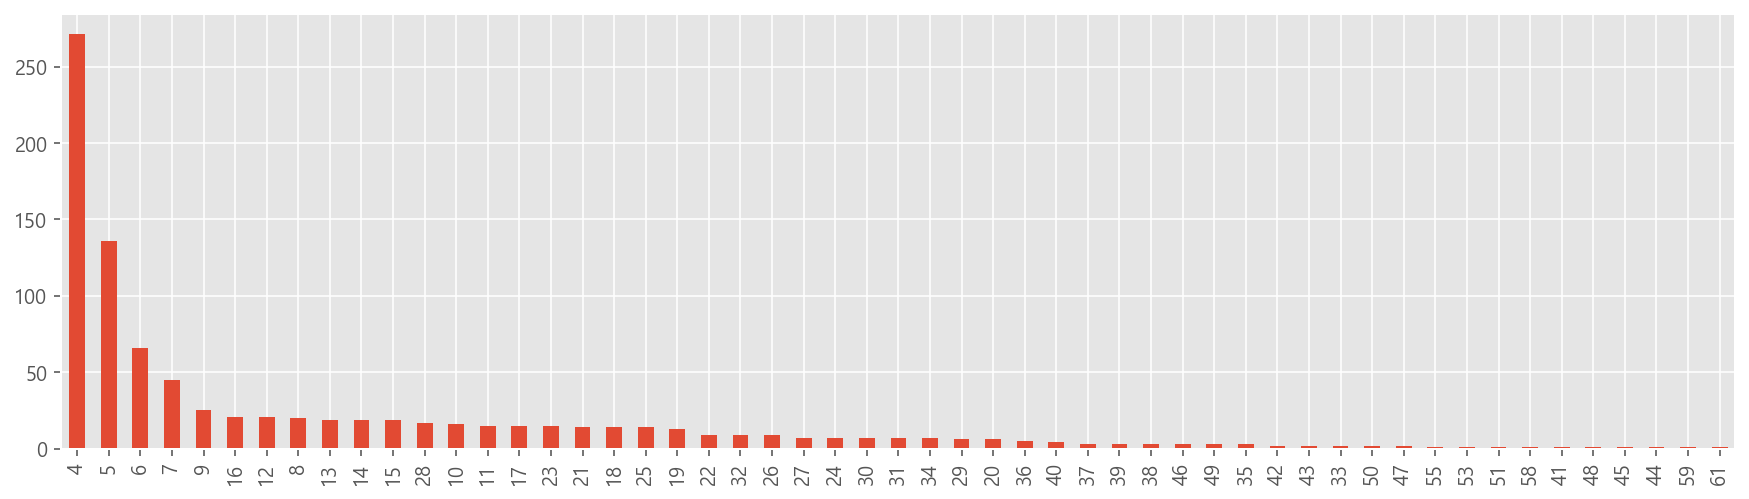

In [34]:
plt.figure(figsize=(15,4))
df['COUNT'].value_counts()[3:].plot.bar()
plt.show()

In [12]:
# 상위 인기 30개 지역
df.loc[df['STORE_ID'].isin(df.groupby('STORE_ID').count()['USER_ID'].sort_values(ascending=False)[:30].index), 'AD1'].unique()

array(['SC', 'J', 'JRR', 'YO', 'GN', 'YD', 'GJ', 'SD', 'MP', 'GS'],
      dtype=object)

C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


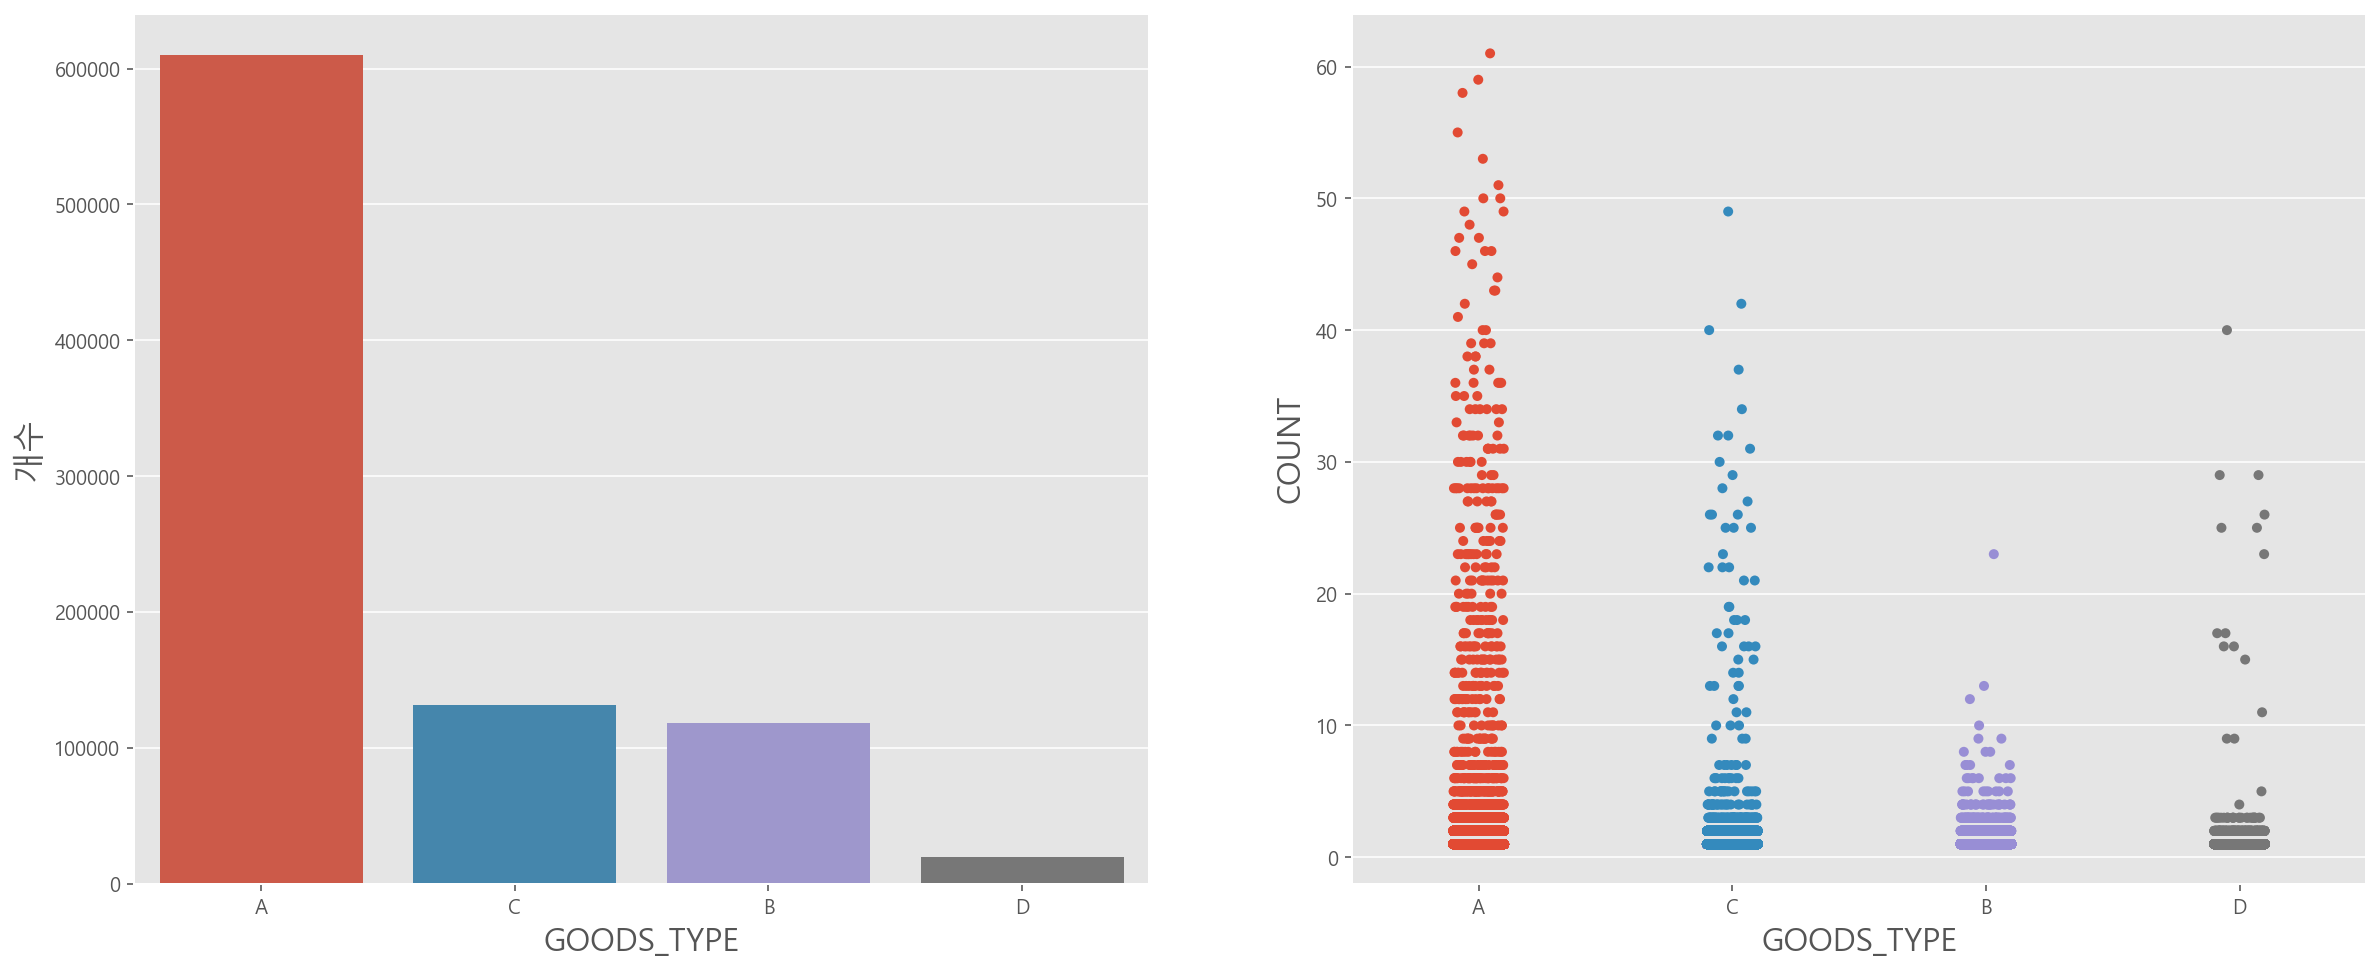

In [13]:
fig = plt.figure(figsize=(20,8))
sns.countplot(data=df, x='GOODS_TYPE', ax=fig.add_subplot(gs[0,0]))

plt.ylabel('개수', fontsize=16)
plt.xlabel('GOODS_TYPE', fontsize=16)

sns.stripplot(x=df['GOODS_TYPE'], y=df['COUNT'], ax=fig.add_subplot(gs[0,1]))
plt.ylabel('COUNT', fontsize=16)
plt.xlabel('GOODS_TYPE', fontsize=16)
fig.show()

In [14]:
df.groupby('USER_ID').count().sort_values('JOIN_DATE', ascending=False)[:30].index

Int64Index([ 999665,  591610, 1355841, 1365069, 1224426, 1407916, 1144500,
            1284291,  909315, 1504815, 1201981,  612237,  640247, 1303371,
             603013, 1532535,  571472, 1506306,  812843, 1392847, 1419336,
            1153775,  325793, 1145004, 1362666, 1342970,  535188, 1140807,
             891031,  697021],
           dtype='int64', name='USER_ID')

In [15]:
# 상위 30명 / 제일 사용많이 한 사람
user_30 = df.groupby('USER_ID').count().sort_values('JOIN_DATE', ascending=False)[:30].index
top_user = df[df['USER_ID']==user_30[0]]
top_user

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,year,month,day,DoW,j_year,j_month,j_day,j_DoW
372,999665,2018-12-16,CC,82399,A,2020-01-01,6,JRR,2020,1,1,Wednesday,2018,12,16,Sunday
1527,999665,2018-12-16,CC,104988,A,2020-01-02,11,GN,2020,1,2,Thursday,2018,12,16,Sunday
3121,999665,2018-12-16,CC,181832,A,2020-01-03,7,SC,2020,1,3,Friday,2018,12,16,Sunday
5034,999665,2018-12-16,CC,109223,A,2020-01-04,28,MP,2020,1,4,Saturday,2018,12,16,Sunday
6919,999665,2018-12-16,CC,104916,A,2020-01-05,14,GN,2020,1,5,Sunday,2018,12,16,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867260,999665,2018-12-16,CC,2428,A,2020-12-27,17,CY,2020,12,27,Sunday,2018,12,16,Sunday
868847,999665,2018-12-16,CC,109267,A,2020-12-28,24,J,2020,12,28,Monday,2018,12,16,Sunday
871562,999665,2018-12-16,CC,90193,C,2020-12-29,23,GW,2020,12,29,Tuesday,2018,12,16,Sunday
874317,999665,2018-12-16,CC,220797,D,2020-12-30,40,GS,2020,12,30,Wednesday,2018,12,16,Sunday


C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


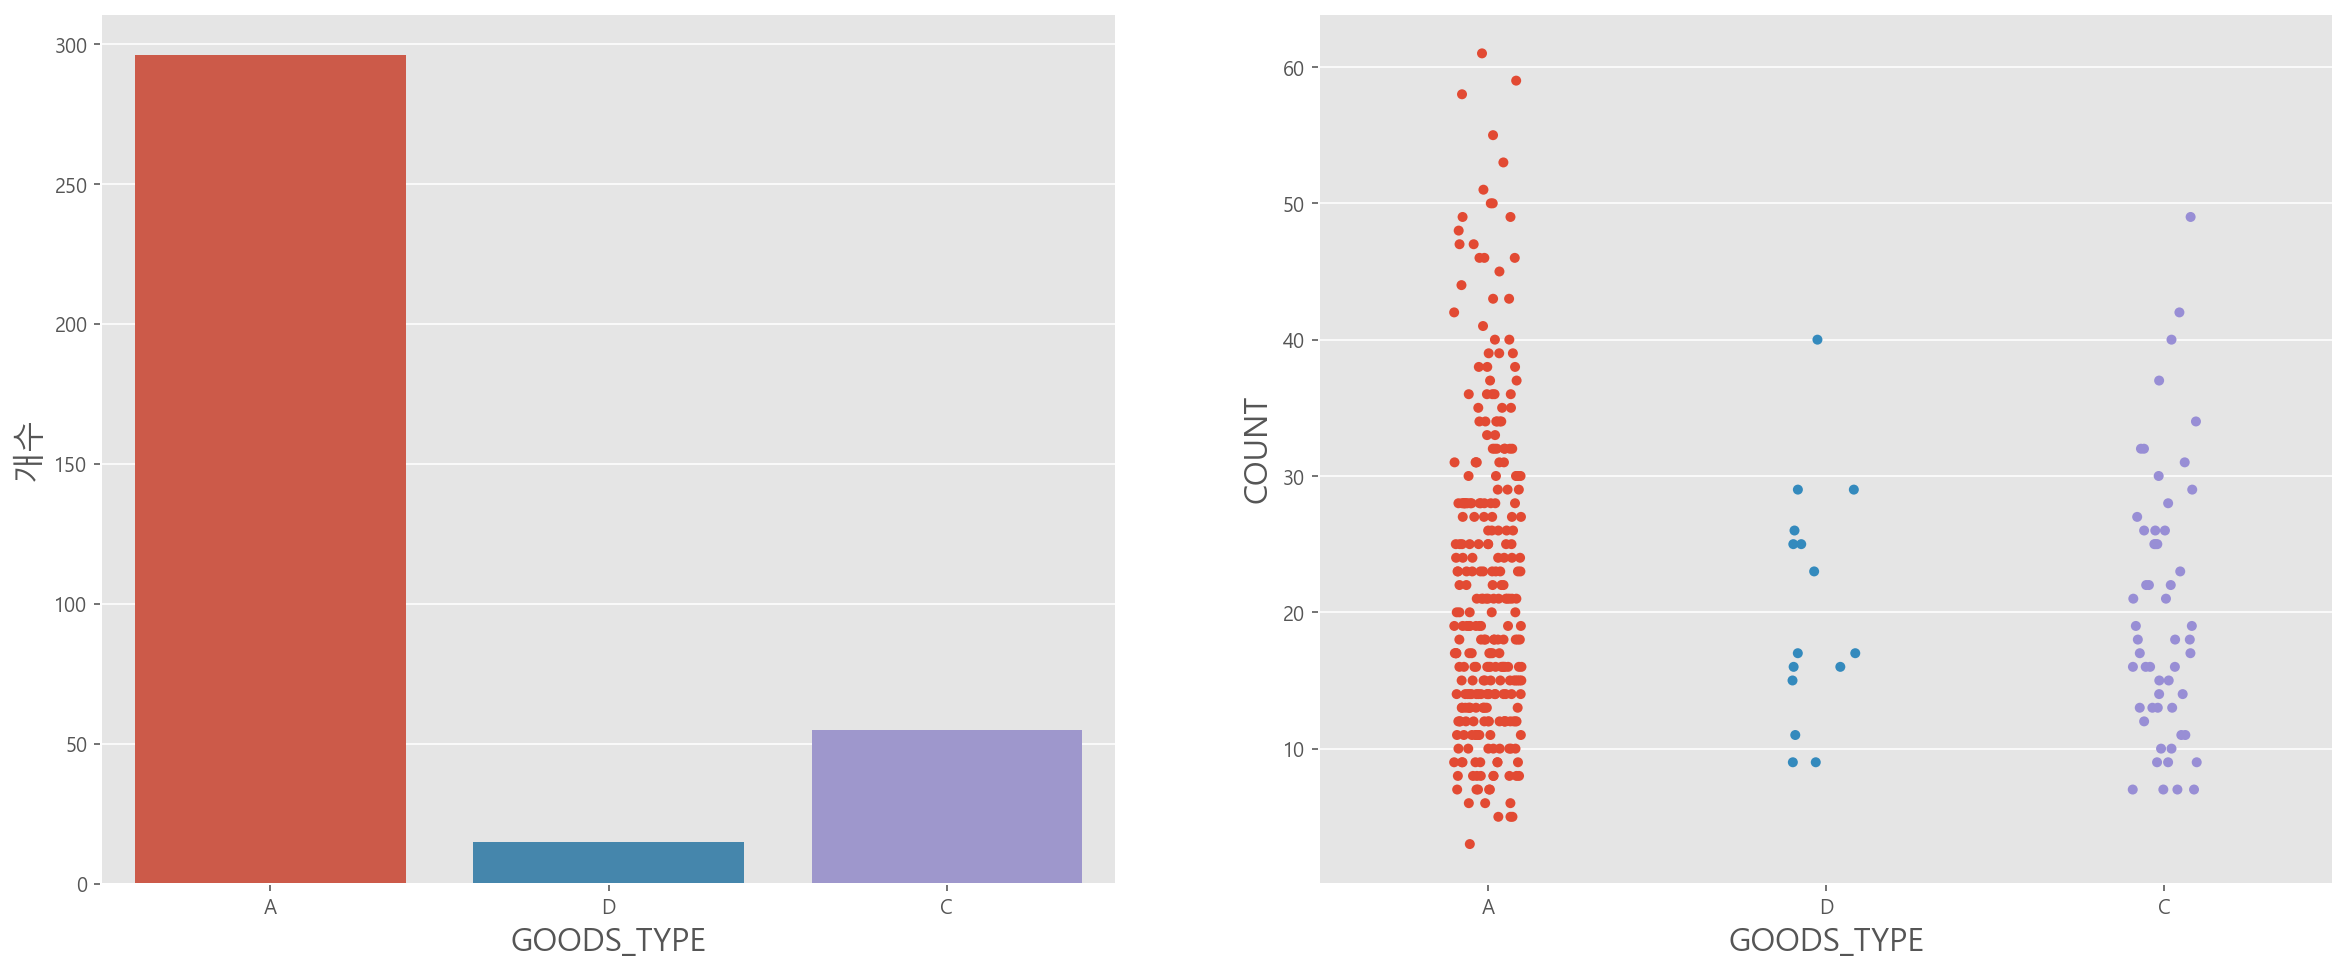

In [16]:
fig = plt.figure(figsize=(20,8))
sns.countplot(data=top_user, x='GOODS_TYPE', ax=fig.add_subplot(gs[0,0]))

plt.ylabel('개수', fontsize=16)
plt.xlabel('GOODS_TYPE', fontsize=16)

sns.stripplot(x=top_user['GOODS_TYPE'], y=top_user['COUNT'], ax=fig.add_subplot(gs[0,1]))
plt.ylabel('COUNT', fontsize=16)
plt.xlabel('GOODS_TYPE', fontsize=16)
fig.show()

C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


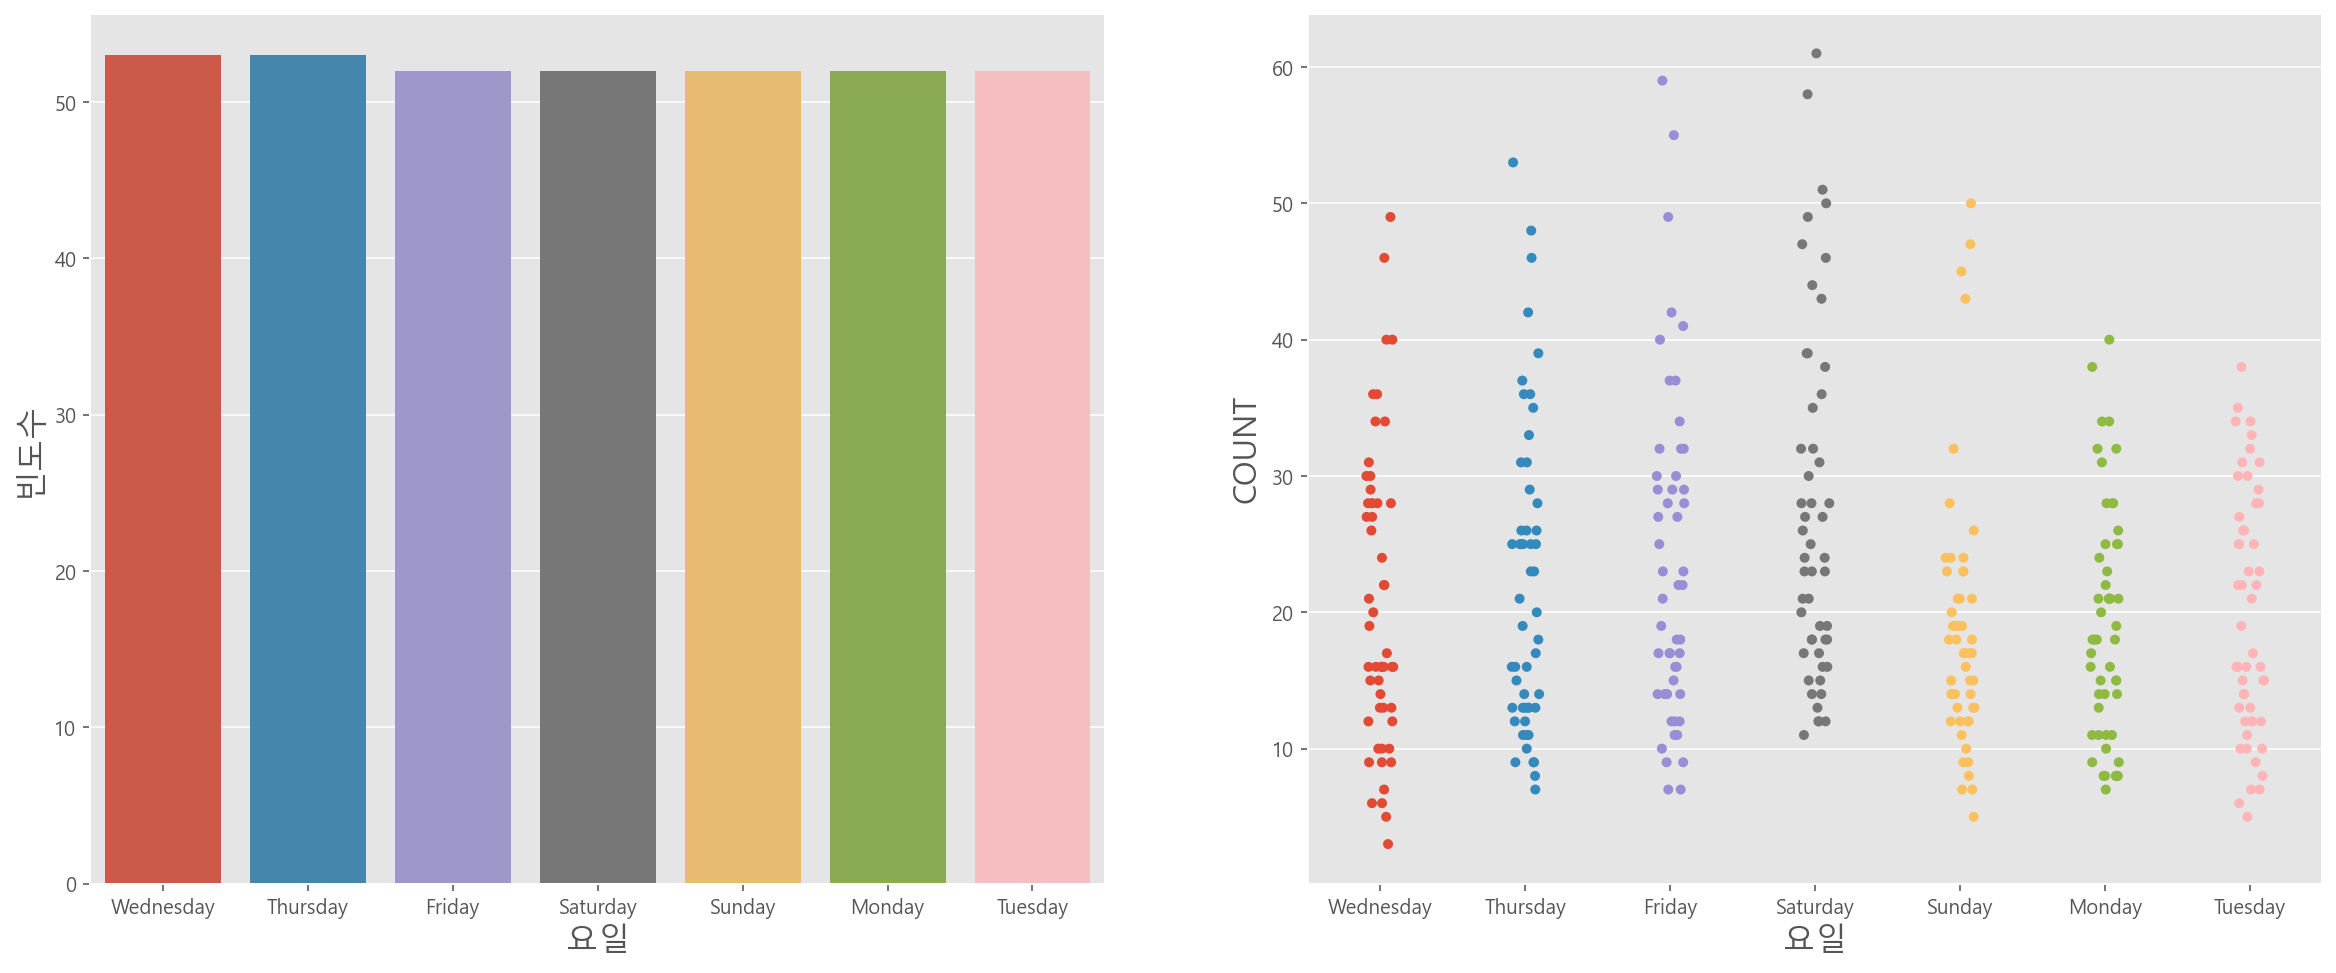

In [17]:
fig = plt.figure(figsize=(20,8))
gs = GridSpec(1,2)
sns.countplot(data=top_user, x='DoW', ax = fig.add_subplot(gs[0,0]))

plt.ylabel('빈도수', fontsize=16)
plt.xlabel('요일', fontsize=16)

sns.stripplot(x=top_user['DoW'], y=df['COUNT'], ax=fig.add_subplot(gs[0,1]))
plt.ylabel('COUNT', fontsize=16)
plt.xlabel('요일', fontsize=16)
fig.show()



Text(0.5, 0, '주소')

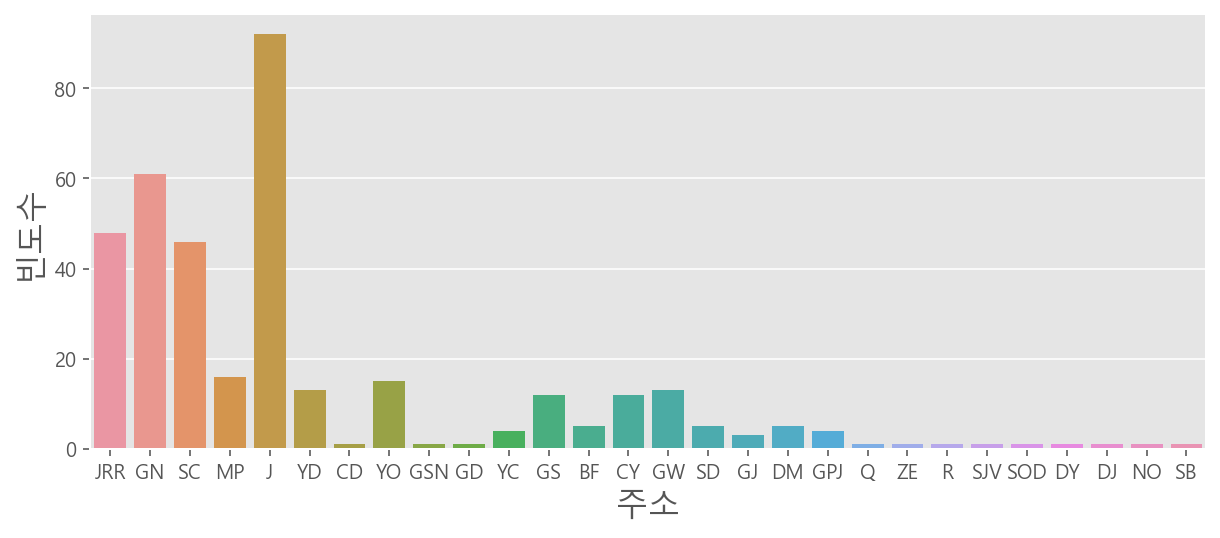

In [18]:
fig = plt.figure(figsize=(10,4))
sns.countplot(data=top_user, x='AD1')

plt.ylabel('빈도수', fontsize=16)
plt.xlabel('주소', fontsize=16)

# sns.stripplot(x=top_user['AD1'], y=df['COUNT'], ax=fig.add_subplot(gs[0,1]))
# plt.ylabel('COUNT', fontsize=16)
# plt.xlabel('요일', fontsize=16)
# fig.show()
